In [1]:
import pandas as pd
import logging
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data

# marylebone street
mar = pd.read_csv(r"C:\Users\tom_r\Desktop\data_science\Data-Science\Westminster Pollution\data\LaqnData_marylebone_road.csv")

# oxford street
oxf = pd.read_csv(r"C:\Users\tom_r\Desktop\data_science\Data-Science\Westminster Pollution\data\LaqnData_oxford_street.csv")

# elizabeth bridge
eli = pd.read_csv(r"C:\Users\tom_r\Desktop\data_science\Data-Science\Westminster Pollution\data\LaqnData_elizabeth_bridge.csv")

# covent garden
cov = pd.read_csv(r"C:\Users\tom_r\Desktop\data_science\Data-Science\Westminster Pollution\data\LaqnData_covent_garden.csv")

In [3]:
mar['Site'] = 'marylebone'
oxf['Site'] = 'oxford street'
eli['Site'] = 'elizabeth bridge'
cov['Site'] = 'covent garden'

In [4]:
data = [mar, oxf, eli, cov]

for d in data:
    print(d.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52704 entries, 0 to 52703
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Site                     52704 non-null  object 
 1   Species                  52704 non-null  object 
 2   ReadingDateTime          52704 non-null  object 
 3   Value                    35411 non-null  float64
 4   Units                    52704 non-null  object 
 5   Provisional or Ratified  52704 non-null  object 
dtypes: float64(1), object(5)
memory usage: 2.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43920 entries, 0 to 43919
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Site                     43920 non-null  object 
 1   Species                  43920 non-null  object 
 2   ReadingDateTime          43920 non-null  object 
 3   Value               

In [5]:
# drop unneeded column
for d in data:
    d.drop(columns=['Provisional or Ratified'], inplace=True)
    print(d.head(1))
    print(d['Species'].value_counts())

         Site Species   ReadingDateTime  Value   Units
0  marylebone      CO  01/01/2024 00:00    0.4  mg m-3
Species
CO      8784
NO      8784
NO2     8784
NOX     8784
O3      8784
PM10    8784
Name: count, dtype: int64
            Site Species   ReadingDateTime  Value   Units
0  oxford street      NO  01/01/2024 00:00   14.6  ug m-3
Species
NO       8784
NO2      8784
NOX      8784
PM10     8784
PM2.5    8784
Name: count, dtype: int64
               Site Species   ReadingDateTime  Value   Units
0  elizabeth bridge      NO  01/01/2024 00:00    5.9  ug m-3
Species
NO       8784
NO2      8784
NOX      8784
PM2.5    8784
Name: count, dtype: int64
            Site Species   ReadingDateTime  Value   Units
0  covent garden      NO  01/01/2024 00:00    0.6  ug m-3
Species
NO       8784
NO2      8784
NOX      8784
PM2.5    8784
Name: count, dtype: int64


In [6]:
eli.head()

,Site,Species,ReadingDateTime,Value,Units
0,elizabeth bridge,NO,01/01/2024 00:00,5.9,ug m-3
1,elizabeth bridge,NO,01/01/2024 01:00,5.0,ug m-3
2,elizabeth bridge,NO,01/01/2024 02:00,6.1,ug m-3
3,elizabeth bridge,NO,01/01/2024 03:00,5.4,ug m-3
4,elizabeth bridge,NO,01/01/2024 04:00,3.5,ug m-3


In [7]:
oxf.head()

,Site,Species,ReadingDateTime,Value,Units
0,oxford street,NO,01/01/2024 00:00,14.6,ug m-3
1,oxford street,NO,01/01/2024 01:00,11.3,ug m-3
2,oxford street,NO,01/01/2024 02:00,11.4,ug m-3
3,oxford street,NO,01/01/2024 03:00,8.0,ug m-3
4,oxford street,NO,01/01/2024 04:00,8.6,ug m-3


In [8]:
# Change datetime formats
for d in data:
    d['ReadingDateTime'] = pd.to_datetime(d['ReadingDateTime'], format="%d/%m/%Y %H:%M")


In [9]:
# combine datasets
df = pd.concat(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 166896 entries, 0 to 35135
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Site             166896 non-null  object        
 1   Species          166896 non-null  object        
 2   ReadingDateTime  166896 non-null  datetime64[ns]
 3   Value            132000 non-null  float64       
 4   Units            166896 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 7.6+ MB


In [10]:
# convert remaining datatypes
df['Site'] = df['Site'].astype('category')
df['Species'] = df['Species'].astype('category')
df['Units'] = df['Units'].astype('category')
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 166896 entries, 0 to 35135
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Site             166896 non-null  category      
 1   Species          166896 non-null  category      
 2   ReadingDateTime  166896 non-null  datetime64[ns]
 3   Value            132000 non-null  float64       
 4   Units            166896 non-null  category      
dtypes: category(3), datetime64[ns](1), float64(1)
memory usage: 4.3 MB


In [12]:
# deal with nan values
for col in df.columns.values:
    print(col, df[col].isna().sum())

Site 0
Species 0
ReadingDateTime 0
Value 34896
Units 0


In [13]:
nan = df[df['Value'].isna() == True]
nan

,Site,Species,ReadingDateTime,Value,Units
25,marylebone,CO,2024-01-02 01:00:00,NaN,mg m-3
62,marylebone,CO,2024-01-03 14:00:00,NaN,mg m-3
120,marylebone,CO,2024-01-06 00:00:00,NaN,mg m-3
144,marylebone,CO,2024-01-07 00:00:00,NaN,mg m-3
168,marylebone,CO,2024-01-08 00:00:00,NaN,mg m-3
...,...,...,...,...,...
34172,covent garden,PM2.5,2024-11-21 20:00:00,NaN,ug m-3
34174,covent garden,PM2.5,2024-11-21 22:00:00,NaN,ug m-3
34186,covent garden,PM2.5,2024-11-22 10:00:00,NaN,ug m-3
34192,covent garden,PM2.5,2024-11-22 16:00:00,NaN,ug m-3


In [14]:
nan['Species'].value_counts()

Species
PM10     16793
NO2       3853
NO        3853
NOX       3853
O3        3167
PM2.5     1779
CO        1598
Name: count, dtype: int64

In [15]:
# As analysis is mainly going to focus on common species NO, NO2 and NOX nan valued rows will be dropped
df = df.dropna(subset=['Value'])
df = df.reset_index(drop=True)

C:\Users\tom_r\AppData\Local\Temp\ipykernel_17600\3469078822.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no['ReadingDateTime'] = pd.to_datetime(no['ReadingDateTime'])  # ensure type
C:\Users\tom_r\AppData\Local\Temp\ipykernel_17600\3469078822.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekly_no = no.groupby('Site').resample('W')['Value'].mean().reset_index()


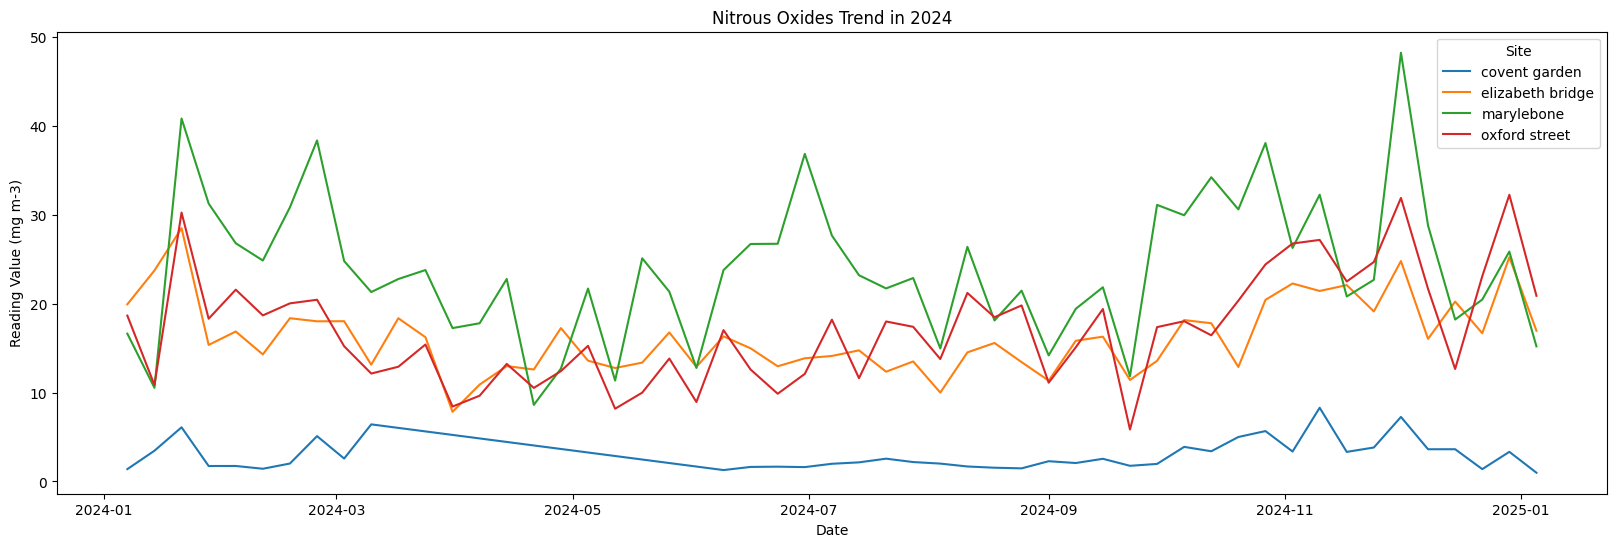

In [19]:
# plot to see site trends throughout the year for Nitrous Oxide

no = df[df['Species'] == 'NO']
no['ReadingDateTime'] = pd.to_datetime(no['ReadingDateTime'])  # ensure type
no.set_index('ReadingDateTime', inplace=True)

weekly_no = no.groupby('Site').resample('W')['Value'].mean().reset_index()

fig, ax = plt.subplots(figsize=(20, 6))
plt.title("Nitrous Oxides Trend in 2024")
plt.xlabel('Date')
plt.ylabel('Reading Value (mg m-3)')
sns.lineplot(data=weekly_no, x='ReadingDateTime', y='Value', hue='Site')
plt.show()

In [20]:
# Plot just Elizabeth bridge for Nitrous Oxide, Nitrous Dioxide and Oxides of Nitrogen

eb_species = ['NO', 'NO2', 'NOX']

eb = (df[df['Site']=='elizabeth bridge']
      .set_index('ReadingDateTime')
      .groupby('Species')
      .resample('W')['Value']
      .mean().reset_index())

eb = eb[eb['Species'].isin(eb_species)]
eb['Species'] = eb['Species'].cat.remove_unused_categories()

print(eb['Species'].unique())
print(len(eb))

['NO', 'NO2', 'NOX']
Categories (3, object): ['NO', 'NO2', 'NOX']
159


C:\Users\tom_r\AppData\Local\Temp\ipykernel_17600\3336871674.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Species')


<Axes: title={'center': 'Nitrous Pollutions in Elizabeth Bridge 2024'}, xlabel='Date', ylabel='Reading Value (mg m-3'>

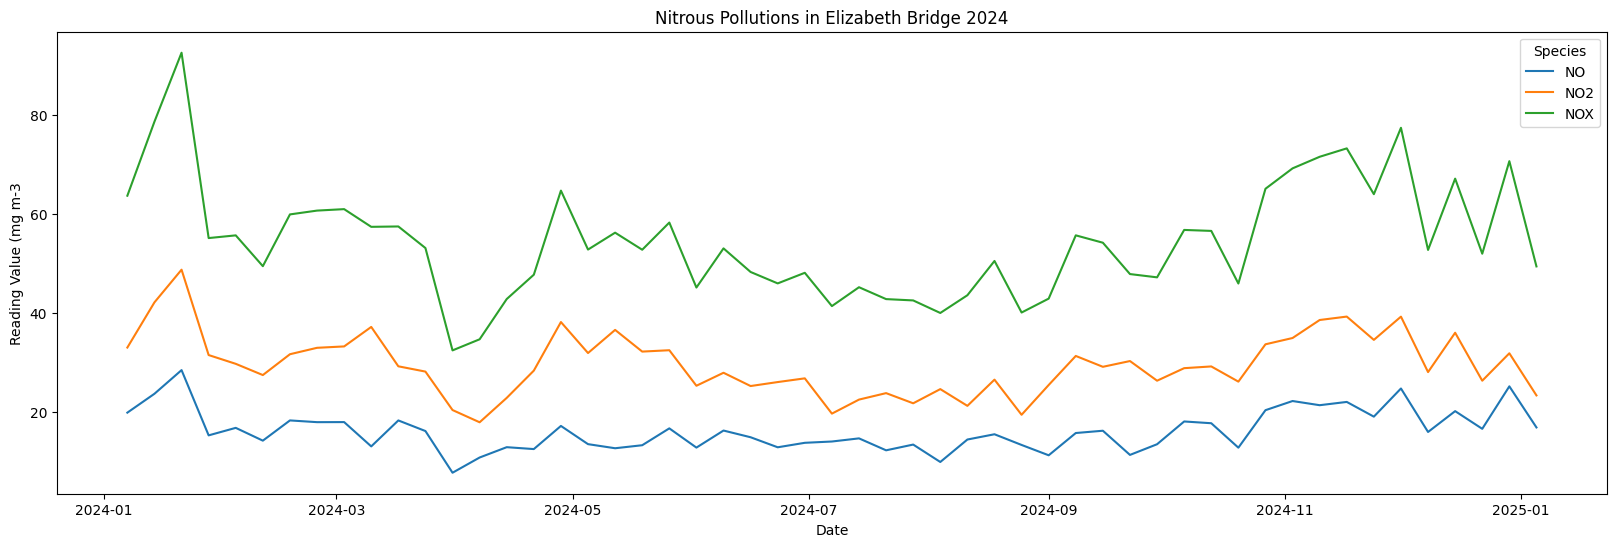

In [18]:
fig, ax = plt.subplots(figsize=(20,6))
plt.title("Nitrous Pollutions in Elizabeth Bridge 2024")
plt.xlabel('Date')
plt.ylabel('Reading Value (mg m-3)')
sns.lineplot(data=eb, x='ReadingDateTime', y='Value', hue='Species')